In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [12]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

LABEL: 3

IMAGE PIXEL ARRAY: 
 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.61361015e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.92195309e-04 3.13725490e-03 1.43021915e-03 5.38254517e-04 1.39946175e-03 3.49096501e-03 1.39946175e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  4.61361015e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.07574010e-05 0.00000000e+00 0.00000000e+00 2.06074587e-03 3.22952710e-03 3.64475202e-03 3.70626682e-03 3.70626682e-03 3.92156863e-03 3.76778162e-03 3.66013072e-03 3.70626682e-03 3.81391772e-03 1.70703576e-03 0.00000000e+00
  0.00000000e+00 4.61361015e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+

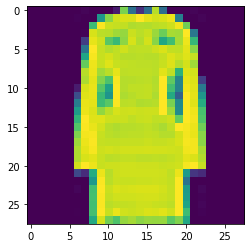

In [28]:
import numpy as np
import matplotlib.pyplot as plt


index = 500;

np.set_printoptions(linewidth = 320)

print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY: \n {training_images[index]}')

plt.imshow(training_images[index])

In [29]:
training_images = training_images/255.0
test_images = test_images/255.0

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [31]:
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function : {inputs.numpy()}')

outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function : {outputs.numpy()}')

sum = tf.reduce_sum(outputs)
print(f'sum of outputs : {sum}')

prediction = np.argmax(outputs)
print(f'class with highest probability : {prediction}')

input to softmax function : [[1. 3. 4. 2.]]
output of softmax function : [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs : 1.0
class with highest probability : 2


In [32]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1000
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0987
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0976
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0985


In [33]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026139736175537, 0.10000000149011612]